In [42]:
# INF2178
# Assignment 3
# Lan Li
# Student Number: 1005814326

# Set working directory
%cd /content/sample_data

/content/sample_data


In [43]:
# Import the packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
%pip install dfply
from dfply import *
from statsmodels.graphics.factorplots import interaction_plot

In [44]:
# Read the csv file as data frame
df = pd.read_csv('INF2178_A3_data.csv')

# Display the first few rows of the dataframe
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [45]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB
None
       fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
count      11933.000000   11933.000000               11933.000000   
mean          35.954215      27.128244                  23.

In [46]:
# summary statistics for dependent variable springgeneralknowledgescore
summary_stats_spring = (df >>
                 group_by(X.incomegroup) >>
                 summarize(
                   count=X['springgeneralknowledgescore'].count(),
                   mean=X['springgeneralknowledgescore'].mean(),
                   std=X['springgeneralknowledgescore'].std()
                 ))

print(summary_stats_spring)

   incomegroup  count       mean       std
0            1   4729  25.069492  7.248229
1            2   3726  29.143605  6.965300
2            3   3478  31.567718  6.928347


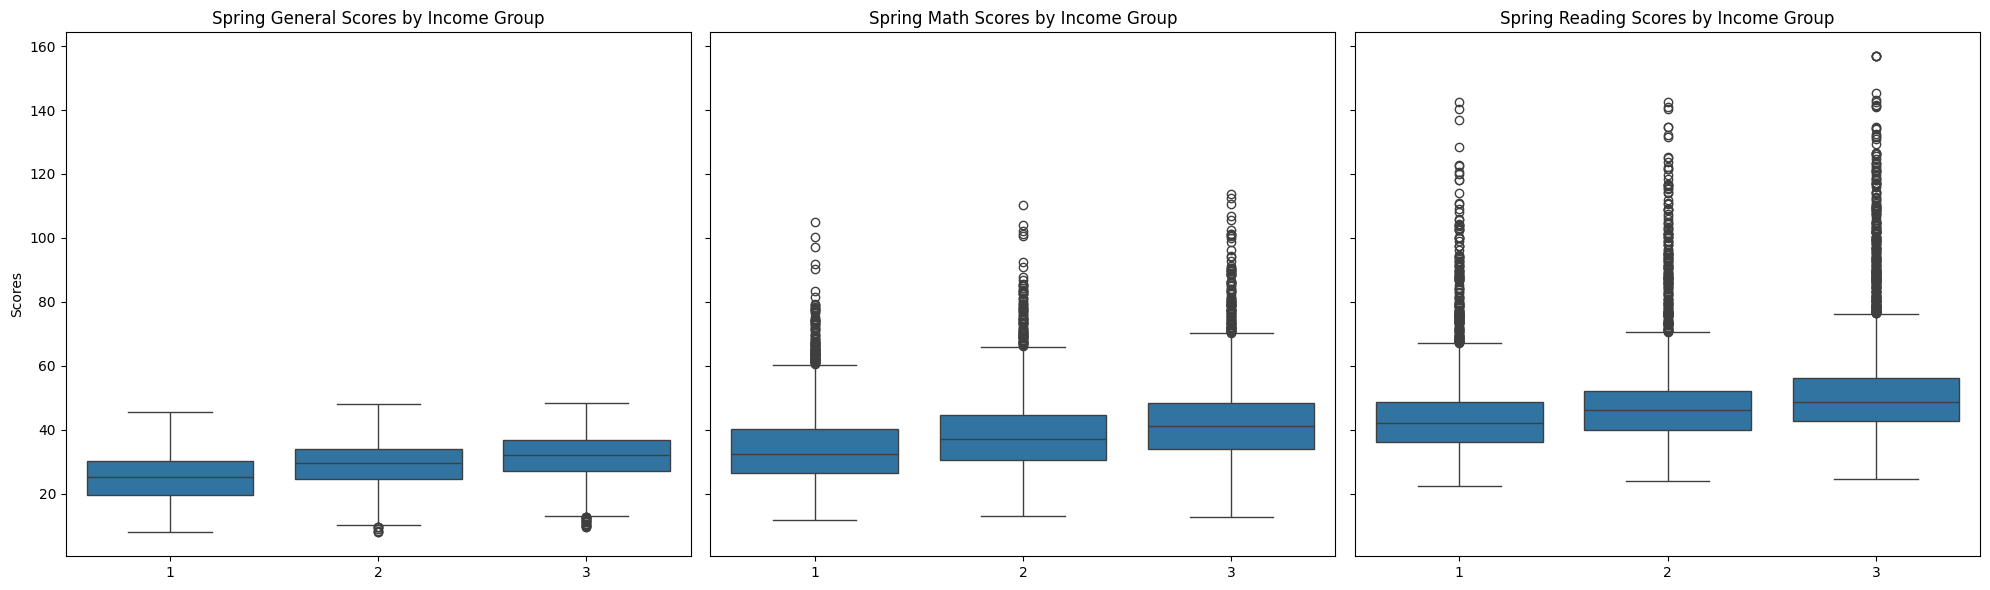

In [47]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharey=True)

# General Knowledge Scores by Income Group
sns.boxplot(ax=axes[0], data=df, x="incomegroup", y="springgeneralknowledgescore")
axes[0].set_title('Spring General Scores by Income Group')
axes[0].set_xlabel('')
axes[0].set_ylabel('Scores')

# Math Scores by Income Group
sns.boxplot(ax=axes[1], data=df, x="incomegroup", y="springmathscore")
axes[1].set_title('Spring Math Scores by Income Group')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Reading Scores by Income Group
sns.boxplot(ax=axes[2], data=df, x="incomegroup", y="springreadingscore")
axes[2].set_title('Spring Reading Scores by Income Group')
axes[2].set_xlabel('')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

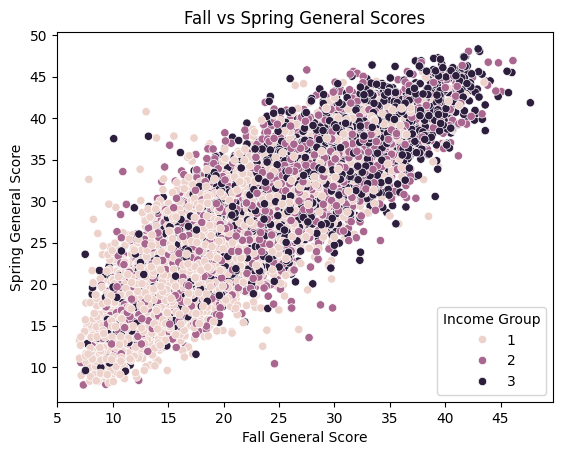

In [48]:
# Scatter plot for fall and spring general scores
sns.scatterplot(data=df, x="fallgeneralknowledgescore", y="springgeneralknowledgescore", hue="incomegroup")
plt.title('Fall vs Spring General Scores')
plt.xlabel('Fall General Score')
plt.ylabel('Spring General Score')
plt.legend(title='Income Group')
plt.show()

# General Knowledge Scores ANCOVA

In [49]:
# Fit the ANCOVA model
model = ols('springgeneralknowledgescore ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.082e+04
Date:                         Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                                 01:03:15   Log-Likelihood:                -33259.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11929   BIC:                         6.656e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [50]:
# Fit ANCOVA model with interaction term between incomegroup and fallgeneralknowledgescore
model_interaction = sm.formula.ols('springgeneralknowledgescore ~ C(incomegroup) * fallgeneralknowledgescore', data=df).fit()

# Print out the summary of the model
print(model_interaction.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.732
Model:                                     OLS   Adj. R-squared:                  0.732
Method:                          Least Squares   F-statistic:                     6524.
Date:                         Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                                 01:03:15   Log-Likelihood:                -33236.
No. Observations:                        11933   AIC:                         6.648e+04
Df Residuals:                            11927   BIC:                         6.653e+04
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------

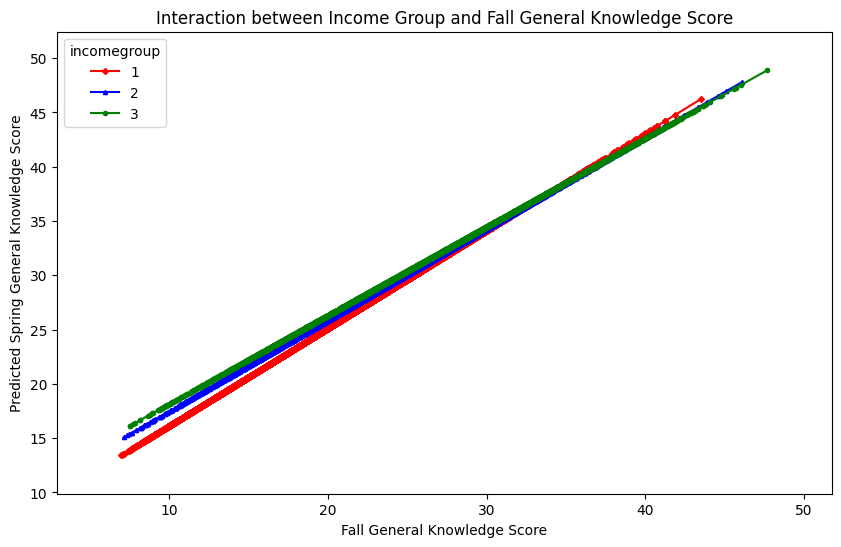

In [58]:
df['fitted_values'] = model_interaction.fittedvalues

# Create the interaction plot
fig, ax = plt.subplots(figsize=(10, 6))
interaction_plot(x=df['fallgeneralknowledgescore'], trace=df['incomegroup'], response=df['fitted_values'],
                 colors=['red', 'blue', 'green'], markers=['D', '^', 'o'], ms=3, ax=ax)

# Add labels and title to the plot
ax.set_xlabel('Fall General Knowledge Score')
ax.set_ylabel('Predicted Spring General Knowledge Score')
ax.set_title('Interaction between Income Group and Fall General Knowledge Score')

# Show the plot
plt.show()

In [59]:
from scipy.stats import shapiro, levene
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Shapiro-Wilk test for normality on the residuals
_, p_normality = shapiro(model.resid)
print(f'Shapiro-Wilk test for normality p-value: {p_normality}')

# Levene's test for equality of variances among residuals of different groups
_, p_levene = levene(df['springgeneralknowledgescore'][df['incomegroup'] == 1],
                     df['springgeneralknowledgescore'][df['incomegroup'] == 2],
                     df['springgeneralknowledgescore'][df['incomegroup'] == 3])
print(f'Levene’s test for equal variances p-value: {p_levene}')

Shapiro-Wilk test for normality p-value: 3.155014791089705e-11
Levene’s test for equal variances p-value: 8.286000485876772e-05


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Math Score ANCOVA

In [60]:
# Fit the ANCOVA model
model_math = ols('springmathscore ~ C(incomegroup) + fallmathscore', data=df).fit()

print(model_math.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:04:03   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2011    

In [61]:
# Fit ANCOVA model with interaction term between incomegroup and fallgeneralknowledgescore
model_interaction_math = sm.formula.ols('springmathscore ~ C(incomegroup) * fallmathscore', data=df).fit()

# Print out the summary of the model
print(model_interaction_math.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     5103.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:04:03   Log-Likelihood:                -39786.
No. Observations:               11933   AIC:                         7.958e+04
Df Residuals:                   11927   BIC:                         7.963e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

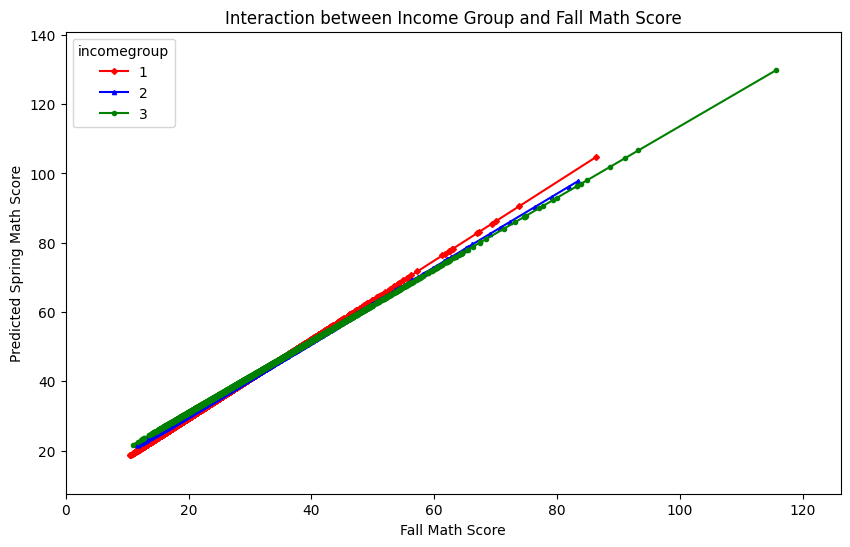

In [62]:
# Interaction plot
df['fitted_values_math'] = model_interaction_math.fittedvalues

fig, ax = plt.subplots(figsize=(10, 6))
interaction_plot(x=df['fallmathscore'], trace=df['incomegroup'], response=df['fitted_values_math'],
                 colors=['red', 'blue', 'green'], markers=['D', '^', 'o'], ms=3, ax=ax)

# Add labels and title to the plot
ax.set_xlabel('Fall Math Score')
ax.set_ylabel('Predicted Spring Math Score')
ax.set_title('Interaction between Income Group and Fall Math Score')

# Show the plot
plt.show()

In [63]:
# Shapiro-Wilk test for normality on the residuals
_, p_normality = shapiro(model_math.resid)
print(f'Shapiro-Wilk test for normality p-value: {p_normality}')

# Levene's test for equality of variances among residuals of different groups
_, p_levene = levene(df['springmathscore'][df['incomegroup'] == 1],
                     df['springmathscore'][df['incomegroup'] == 2],
                     df['springmathscore'][df['incomegroup'] == 3])
print(f'Levene’s test for equal variances p-value: {p_levene}')

Shapiro-Wilk test for normality p-value: 0.0
Levene’s test for equal variances p-value: 6.380804527269148e-09


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
